# Warm up 14 - Vehicle Stock in China

TEP4290, Spring 2024

## Preparation: Packages and data imports

Start by importing the necessary packages:

In [1]:
# Write all the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_stock_model import DynamicStockModel

Then import the data into a Dataframe using the pandas read_excel function (check the documentation to find out which arguments to use) and clean it.

In [ ]:
# Extracting data from the source file into a panda Dataframe
file = "Warm_up_14_data.xlsx"
# This file should be placed in the same directory as this notebook (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
data = pd.read_excel(file, sheet_name="CarStockData", header=[1])
data_unit = data.iloc[:2, 2:]
data = data.iloc[2:, 2:]

# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0.0, inplace=True)

C:\Users\yiwenli\AppData\Local\Temp\ipykernel_43424\1475854448.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)


We create two Dataframes from data:
 - historic_data with values up to 2008
 - future_data with values for 2009 and after


In [3]:
historic_data = data[data.Time < 2009]
future_data = data[data.Time >= 2009]

## Inflow-driven model

Calculate outflows, stock change and stock for historic data, using an inflow-driven model:

In [4]:
# inflow-driven model by dynamic stock model package
DSM_historic = DynamicStockModel(t=historic_data['Time'].values, i=historic_data['Inflow'].values, lt = {'Type': 'Normal', 'Mean': np.array([15]), 'StdDev': np.array([5])})

In [5]:
CheckStr, ExitFlag = DSM_historic.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 59 years.<br>Inflow vector is present with 59 years.<br>Total stock is not present.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15].<br>


In [6]:
# calculating the time-cohort matrix
Stock_tc_historic, ExitFlag = DSM_historic.compute_s_c_inflow_driven()
print(Stock_tc_historic)

[[1.15786405e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.15603104e+03 3.08565102e+03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.15288560e+03 3.08076616e+03 1.31464458e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.12725591e+00 5.66903290e+00 2.41529691e+00 ... 5.33073384e+06
  0.00000000e+00 0.00000000e+00]
 [2.12725591e+00 5.66903290e+00 2.41529691e+00 ... 5.32229481e+06
  6.30587946e+06 0.00000000e+00]
 [2.12725591e+00 5.66903290e+00 2.41529691e+00 ... 5.30781337e+06
  6.29589669e+06 7.06752064e+06]]


In [7]:
# calculating the outflows and total outflows
O_C_historic, ExitFlag = DSM_historic.compute_o_c_from_s_c()  
print(O_C_historic)
O_historic, ExitFlag = DSM_historic.compute_outflow_total()
print(O_historic)


# calculating the total stock
S_historic, ExitFlag   = DSM_historic.compute_stock_total()
print(S_historic)

# calculating the stock change
DS_historic, ExitFlag = DSM_historic.compute_stock_change()
print(DS_historic)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.83300336e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.14544635e+00 4.88486425e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.57127653e-13 3.08375547e-12 6.42197406e-12 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.84785562e-13 1.31361588e-12 ... 8.43903313e+03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.91766611e-13 ... 1.44814388e+04
  9.98277672e+03 0.00000000e+00]]
[0.00000000e+00 1.83300336e+00 8.03031060e+00 1.56496260e+01
 3.32744176e+01 5.91021256e+01 9.64698195e+01 1.55653062e+02
 2.34742197e+02 3.45035593e+02 4.90542550e+02 6.65702736e+02
 8.79676318e+02 1.12920717e+03 1.40863252e+03 1.71386997e+03
 2.03826112e+03 2.36436839e+03 2.68175800e+03 2.98303845e+03
 3.26191743e+03 3.52380381e+03 3.76786772e+03 4.01219822e+03
 4.26765591e+03 4.55605064e+03 4.9

In [8]:
historic_data.loc[:, 'Stock'] = S_historic
historic_data.loc[:, 'Outflow'] = O_historic
historic_data.loc[:, 'Stock Change'] = DS_historic

# calculating the cars per 1000 people
historic_data.loc[:, 'cars per 1000 people'] = historic_data['Stock'] / historic_data['Population']

## Stock-driven model

Calculate stock change, outflows and inflows for future data, using a stock-driven model.
You need to run the stock-driven model for all years, combining historic stock data from the inflow-driven model, and future stock data from population and car ownership projections.

In [9]:
# calculating the stock by population and cars per 1000 people
future_data.loc[:, 'Stock'] = future_data['cars per 1000 people'] * future_data['Population']

# combining the historic and future data
data_updated = pd.concat([historic_data, future_data])

In [10]:
# stock-driven model by dynamic stock model package
DSM_updated = DynamicStockModel(t=data_updated['Time'].values, s= data_updated['Stock'].values, lt = {'Type': 'Normal', 'Mean': np.array([15]), 'StdDev': np.array([5])})

In [11]:
CheckStr, ExitFlag = DSM_updated.dimension_check()
print(CheckStr)

<br><b> Checking dimensions of dynamic stock model DSM.Time vector is present with 101 years.<br>Inflow is not present.<br>Total stock is present with 101 years.<br>Stock by cohorts is not present.<br>Total outflow is not present.<br>Outflow by cohorts is not present.<br>Lifetime distribution is present with type Normal and mean [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15].<br>


In [12]:
# calculating time-cohort matrix, outflow change and inflow
Stock_tc_updated, O_C_updated, I_updated, ExitFlag = DSM_updated.compute_stock_driven_model()

In [13]:
# calculating total outflows
O_updated, ExitFlag = DSM_updated.compute_outflow_total()
print(O_updated)

# calculating the stock change
DS_updated, ExitFlag = DSM_updated.compute_stock_change()
print(DS_updated)

[0.00000000e+00 1.83300336e+00 8.03031060e+00 1.56496260e+01
 3.32744176e+01 5.91021256e+01 9.64698195e+01 1.55653062e+02
 2.34742197e+02 3.45035593e+02 4.90542550e+02 6.65702736e+02
 8.79676318e+02 1.12920717e+03 1.40863252e+03 1.71386997e+03
 2.03826112e+03 2.36436839e+03 2.68175800e+03 2.98303845e+03
 3.26191743e+03 3.52380381e+03 3.76786772e+03 4.01219822e+03
 4.26765591e+03 4.55605064e+03 4.90772410e+03 5.34455854e+03
 5.88754429e+03 6.58727573e+03 7.47591729e+03 8.60571063e+03
 9.99625993e+03 1.16437280e+04 1.35744616e+04 1.58618686e+04
 1.86966235e+04 2.19141104e+04 2.55916109e+04 2.98880384e+04
 3.48350598e+04 4.05783447e+04 4.73669290e+04 5.55686319e+04
 6.55273050e+04 7.74088732e+04 9.15451053e+04 1.08257905e+05
 1.28275039e+05 1.51521373e+05 1.78843990e+05 2.11057545e+05
 2.48889053e+05 2.93772758e+05 3.46969952e+05 4.08628396e+05
 4.82181840e+05 5.69550495e+05 6.73776960e+05 7.98422375e+05
 9.48518352e+05 1.13003202e+06 1.34998026e+06 1.61583980e+06
 1.93539406e+06 2.316347

In [14]:
data_updated.loc[:, 'Inflow'] = I_updated
data_updated.loc[:, 'Outflow'] = O_updated
data_updated.loc[:, 'Stock Change'] = DS_updated

Stock_TC = pd.DataFrame(Stock_tc_updated, index = data_updated['Time'], columns = data_updated['Time'])

## Final calculations

Perform the calculations for distance driven, fuel consumption and CO2 emissions

In [15]:
# calculating the distance driven
data_updated.loc[:, 'Total km driven'] = data_updated['Stock'] * data_updated['Kilometrage per vehicle'] / 1000000000  # in billion km/yr

# calculating the total fuel consumption
data_updated.loc[:, 'Total gasoline consumend'] = data_updated['Total km driven'] * 10000000 * data_updated['Fuel efficiency'] / 1000000 # in million liters/yr

# calculating the CO2 emissions
data_updated.loc[:, 'Total direct CO2 emissions'] = data_updated['Total gasoline consumend'] * 1000000 * data_updated['Carbon intensity'] / 1000000000  # in million tons/yr

## Plot the results

Plot the results of the model for inflows and outflows, stock change, stock, total distance driven, total fuel consumption, and total CO2 emissions

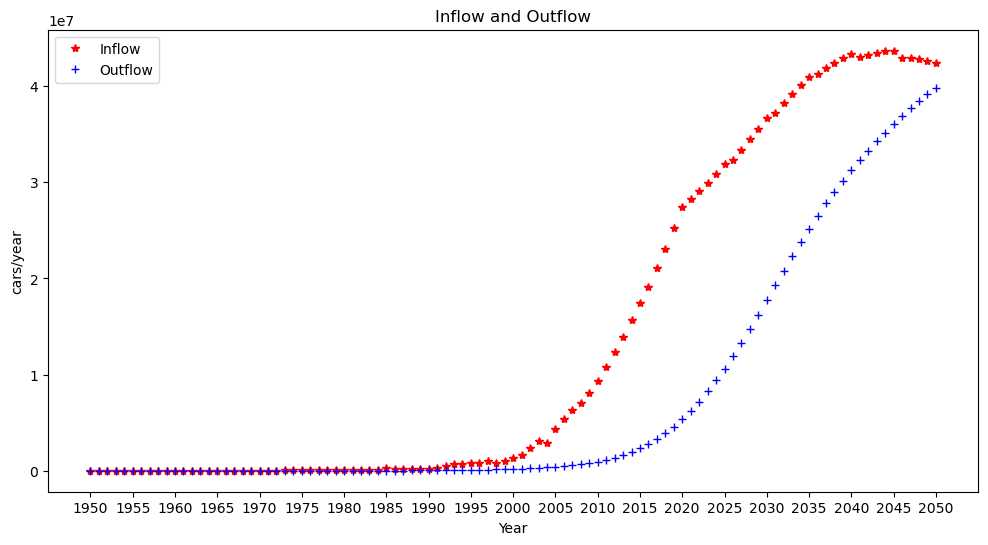

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the inflow and outflow
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Inflow'],  color='red', marker='*', label='Inflow', linestyle='')
plt.plot(data_updated['Time'], data_updated['Outflow'], color='blue', marker='+', label='Outflow', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('cars/year')
plt.title('Inflow and Outflow')
plt.legend(loc='upper left')
plt.show()

# save the plot
plt.savefig('Inflow and Outflow.jpg', dpi=300)


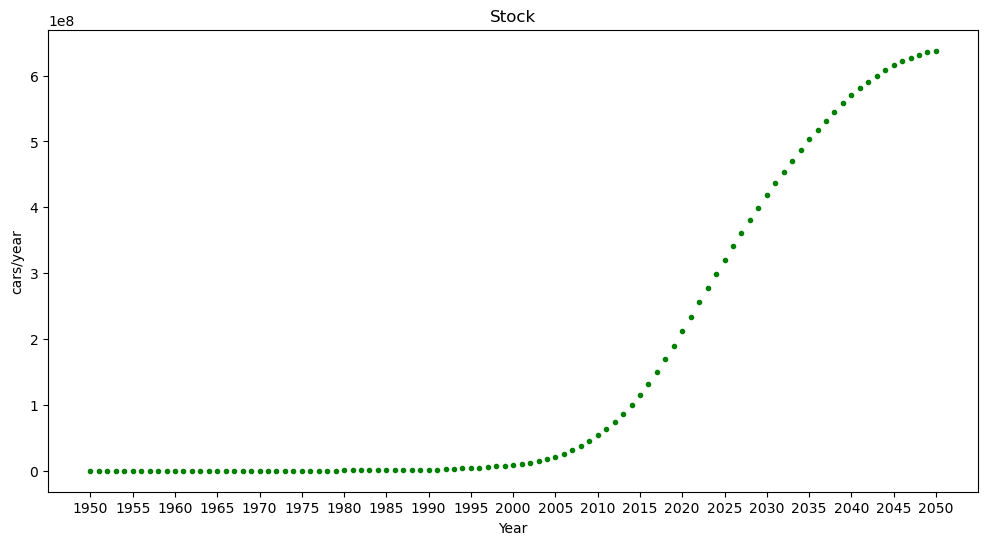

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the stock
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Stock'], color='green', marker='.', label='Stock', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('cars/year')
plt.title('Stock')
plt.show()

# save the plot
plt.savefig('Stock.jpg', dpi=300)

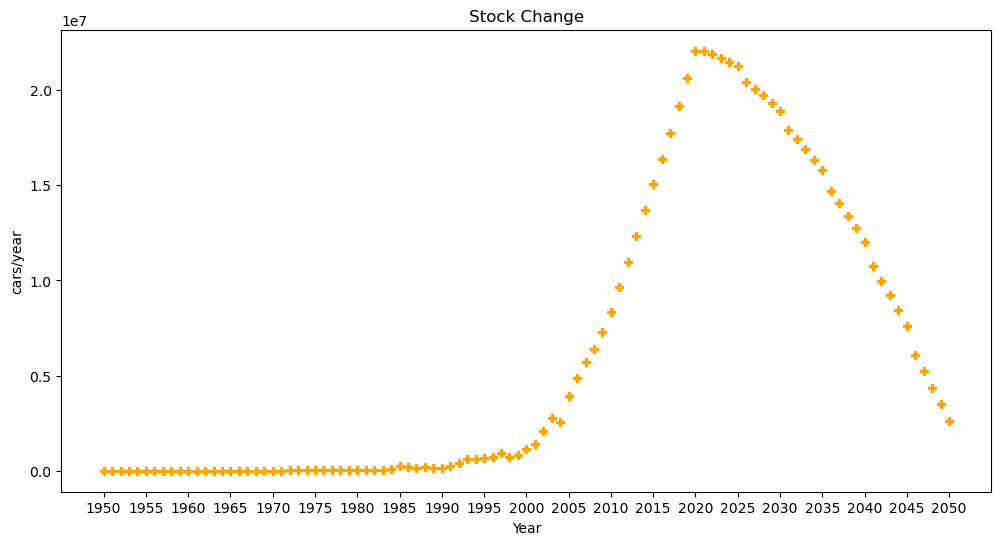

<Figure size 640x480 with 0 Axes>

In [18]:
# plot the stock change
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Stock Change'], color='orange', marker='P', label='Stock Change', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('cars/year')
plt.title('Stock Change')
plt.show()

# save the plot
plt.savefig('Stock Change.jpg', dpi=300)

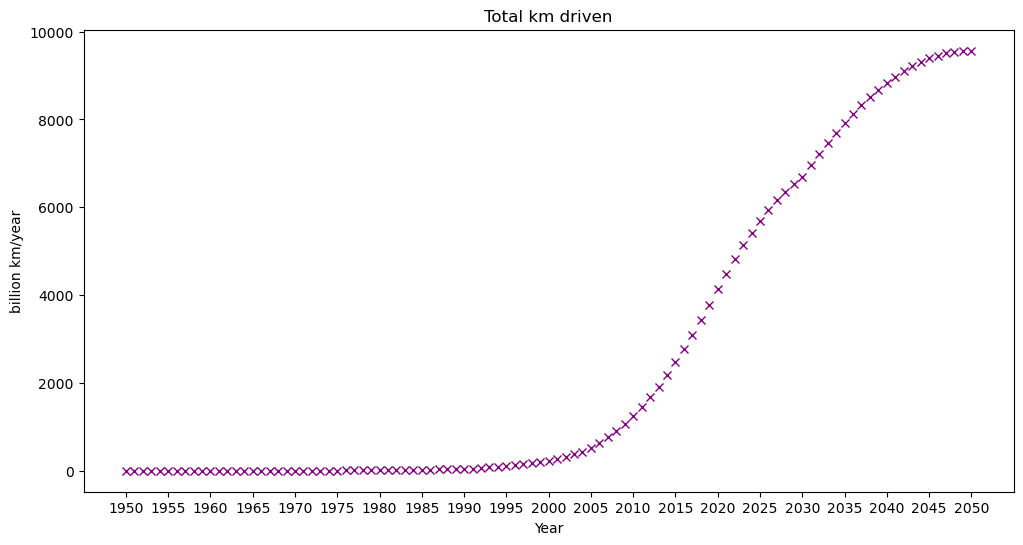

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the total km driven
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Total km driven'], color='purple', marker='x', label='Total km driven', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('billion km/year')
plt.title('Total km driven')
plt.show()

# save the plot
plt.savefig('Total km driven.jpg', dpi=300)

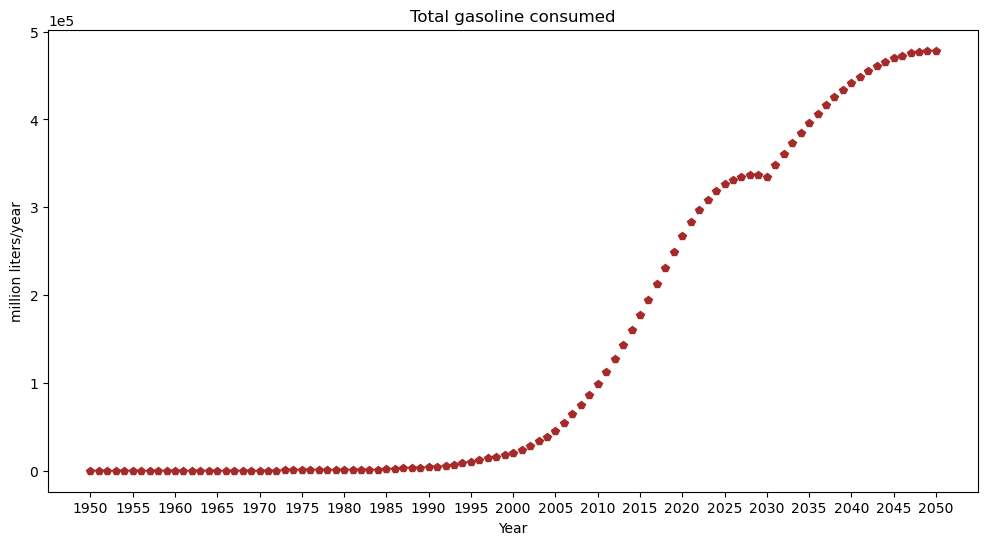

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the total gasoline consumed
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Total gasoline consumend'], color='brown', marker='p', label='Total gasoline consumed', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('million liters/year')
# use scientific notation for the y-axis
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Total gasoline consumed')
plt.show()

# save the plot
plt.savefig('Total gasoline consumed.jpg', dpi=300)

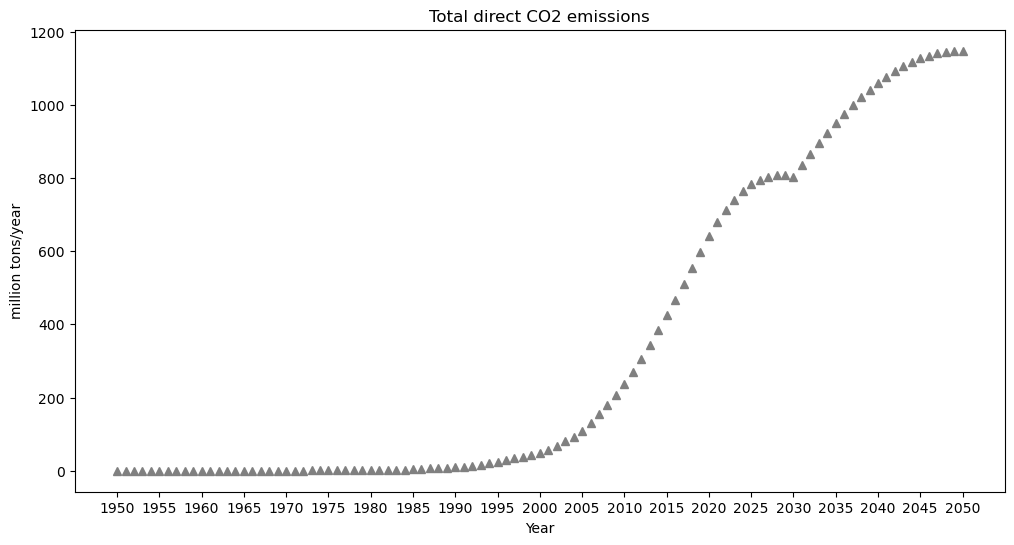

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the total direct CO2 emissions
plt.figure(figsize=(12, 6))
plt.plot(data_updated['Time'], data_updated['Total direct CO2 emissions'], color='grey', marker='^', label='Total direct CO2 emissions', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('million tons/year')
plt.title('Total direct CO2 emissions')
plt.show()

# save the plot
plt.savefig('Total direct CO2 emissions.jpg', dpi=300)


## Exports the results

Export the results to a new Excel file - you can then in the end before submission copy the stock over to the existing data if you prefer to, but it is not required of you

In [22]:
# save the updated data to excel file, different sheet
# updated data 
writer = pd.ExcelWriter('Dynamic stock model results.xlsx', engine='xlsxwriter')
data_updated = pd.concat([data_unit, data_updated], axis=0)
data_updated.to_excel(writer, sheet_name='CarStockData', index=False)

# stock time-cohort matrix
Stock_TC.to_excel(writer, sheet_name='Stock_TC', index=True)

# close the writer
writer.close()

## Interpretation

By  how  much  will  the  total  kilometrage  and  the  total carbon  footprint  increase  between  2000  and  2050?  
What  about  the  life-cycle footprint of a single car

In [23]:
distance_change = data_updated.loc[data_updated.loc[:, 'Time'] == 2050, 'Total km driven'].values - data_updated.loc[data_updated.loc[:, 'Time'] == 2000, 'Total km driven'].values
distance_change_ratio = distance_change / data_updated.loc[data_updated.loc[:, 'Time'] == 2000, 'Total km driven'].values
print('The change in total kilometrage driven from 2000 to 2050 is', distance_change[0], 'billion km/year', 'and the change ratio is', distance_change_ratio[0], '%')

CO2_change = data_updated.loc[data_updated.loc[:, 'Time'] == 2050, 'Total direct CO2 emissions'].values - data_updated.loc[data_updated.loc[:, 'Time'] == 2000, 'Total direct CO2 emissions'].values
CO2_change_ratio = CO2_change / data_updated.loc[data_updated.loc[:, 'Time'] == 2000, 'Total direct CO2 emissions'].values
print('The change in total CO2 emissions from 2000 to 2050 is', CO2_change[0], 'million tons/year', 'and the change ratio is', CO2_change_ratio[0], '%')


The change in total kilometrage driven from 2000 to 2050 is 9341.263627018405 billion km/year and the change ratio is 41.74117920202724 %
The change in total CO2 emissions from 2000 to 2050 is 1099.0918160293666 million tons/year and the change ratio is 22.56184079494335 %


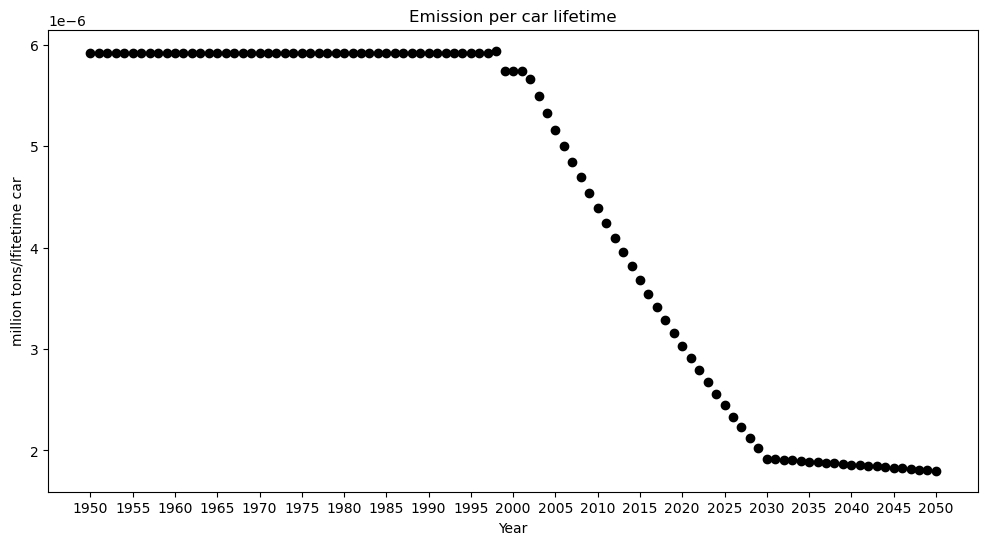

In [24]:
emission_per_car = data_updated.loc[2:,'Total direct CO2 emissions'].values / data_updated.loc[2:,'Stock'].values
emission_per_car = pd.DataFrame(emission_per_car, columns=['Emission per car'], index=data_updated.loc[2:,'Time'])


# calculate the emission per car during the lifetime
# sum the emission per car during the lifetime
emission_per_car_lifetime = []
for year in data_updated.loc[2:,'Time']:
    emission = (
        (emission_per_car.loc[emission_per_car.index <= year, 'Emission per car'].values *
         Stock_TC.loc[Stock_TC.index <= year, year].values).sum()
        / Stock_TC.loc[year, year]
    )
    emission_per_car_lifetime.append(emission)
emission_per_car_lifetime = pd.DataFrame(emission_per_car_lifetime, columns=['Emission per car lifetime'], index=data_updated.loc[2:,'Time'])

# plot emission per car lifetime, x is the inflow year
plt.figure(figsize=(12, 6))
plt.plot(data_updated.loc[2:,'Time'], emission_per_car_lifetime, color='black', marker='o', label='Emission per car lifetime', linestyle='')
plt.xlabel('Year')
plt.xticks(np.arange(1950, 2051, 5))
plt.ylabel('million tons/lfitetime car')
plt.title('Emission per car lifetime')
plt.show()



The emission per car over its lifetime has decreased since 2000 due to a continued reduction in driven kilometrage. However, from 2003 onward, the decline became more pronounced as fuel efficiency improved alongside the continued decrease in kilometrage. After 2030, the rate of decline slows down as fuel efficiency stabilizes.
